<a href="https://colab.research.google.com/github/Tema13379/2intensiv2/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Библиотеки

In [2]:
!pip install pandas scikit-learn lightgbm xgboost catboost matplotlib seaborn optuna --quiet

# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Загружаем данные из pandas
train = pd.read_csv('train.csv')
train.head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
<ipython-input-2-7748567f3f87>:24: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164


In [ ]:
valid = pd.read_csv('valid.csv')
valid.head()

<ipython-input-115-4dca6dd4317a>:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,91,95,96,97,99,131,132,133,135,136,140,141,142,144,145,146,147,148,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,207,208,211,212,213,215,216,239,240,241,243,244,245,459,467,563,567,571,575,579,580,583,611,612,795,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1047,1055,1063,1064,1071,1072,1073,1074,1175,1176,1177,1178,1179,1180,1181,1182,1277,1278,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1653,1654,1656,2193,2194,2195,2196,2199) have mixed types. Specify dtype option on import or set low_memory=False.
  valid = pd.read_csv('valid.csv')


,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2023-04-01,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4941670.0,4941670.0,4941670.0,NaN,NaN,NaN,4941670.0,4941670.0,4941670.0,0.256919
1,2023-05-01,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11789500.0,11789500.0,11789500.0,NaN,NaN,NaN,11789500.0,11789500.0,11789500.0,0.267221
2,2023-05-01,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7000000.0,7000000.0,7000000.0,NaN,NaN,NaN,7000000.0,7000000.0,7000000.0,0.257217
3,2023-03-01,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
4,2023-03-01,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10391000.0,10391000.0,10391000.0,0.257348


Процент пропусков

In [3]:
# Вычислить общее количество строк
total_rows = train.shape[0]

# Вычислить процент пропущенных значений для каждого столбца
missing_values = (train.isnull().sum() / total_rows) * 100

# Вывести столбцы с пропущенными значениями и их проценты
print(missing_values[missing_values > 0])

# Альтернативно, пройтись по каждому столбцу и вывести процент пропущенных значений
for column in train.columns:
    missing_count =train[column].isnull().sum()
    if missing_count > 0:
        missing_percentage = (missing_count / total_rows) * 100
        print(f"{column}: {missing_percentage:.2f}%")

col1       99.979247
col2       99.958495
col3       99.916989
col4       99.868567
col5       99.993082
             ...    
col2658    96.499723
col2659    96.499723
col2660    44.410625
col2661    44.410625
col2662    44.410625
Length: 2661, dtype: float64
col1: 99.98%
col2: 99.96%
col3: 99.92%
col4: 99.87%
col5: 99.99%
col6: 99.99%
col7: 99.98%
col8: 99.94%
col9: 99.99%
col10: 99.99%
col11: 99.98%
col12: 99.94%
col13: 99.99%
col14: 99.99%
col15: 99.98%
col16: 99.94%
col17: 99.99%
col18: 99.99%
col19: 99.98%
col20: 99.94%
col21: 99.99%
col22: 99.99%
col23: 99.98%
col24: 99.94%
col25: 99.99%
col26: 99.99%
col27: 99.98%
col28: 99.94%
col29: 99.99%
col30: 99.99%
col31: 99.98%
col32: 99.94%
col33: 99.99%
col34: 99.99%
col35: 99.98%
col36: 99.94%
col37: 99.99%
col38: 99.99%
col39: 99.98%
col40: 99.94%
col41: 99.99%
col42: 99.99%
col43: 99.98%
col44: 99.94%
col45: 99.97%
col46: 99.88%
col47: 99.69%
col48: 99.17%
col49: 99.97%
col50: 99.89%
col51: 99.73%
col52: 99.26%
col53: 99.97%
col54: 

In [ ]:
train.describe(include=['object'])

,report_date,col49,col50,col51,col52,col53,col54,col55,col56,col57,...,col1653,col1654,col2191,col2192,col2193,col2194,col2195,col2196,col2197,col2198
count,14456,5,16,39,107,5,18,45,120,5,...,2,18,19,66,106,156,273,353,36,369
unique,25,5,8,9,18,5,9,10,20,3,...,2,11,7,21,33,38,45,50,17,50
top,2023-01-01,https://samolet.ru/commercial/,https://samolet.ru/,https://samolet.ru/,https://samolet.ru/project/,https://samolet.ru/commercial/,https://samolet.ru/,https://samolet.ru/,https://samolet.ru/project/,main,...,Тестовая бронь,Дубль заявки,Замена квартиры,Замена квартиры,Замена квартиры,Замена квартиры,Замена квартиры,Замена квартиры,Замена квартиры,Замена квартиры
freq,1159,1,6,17,40,1,6,19,45,3,...,1,3,13,42,59,82,146,189,20,191


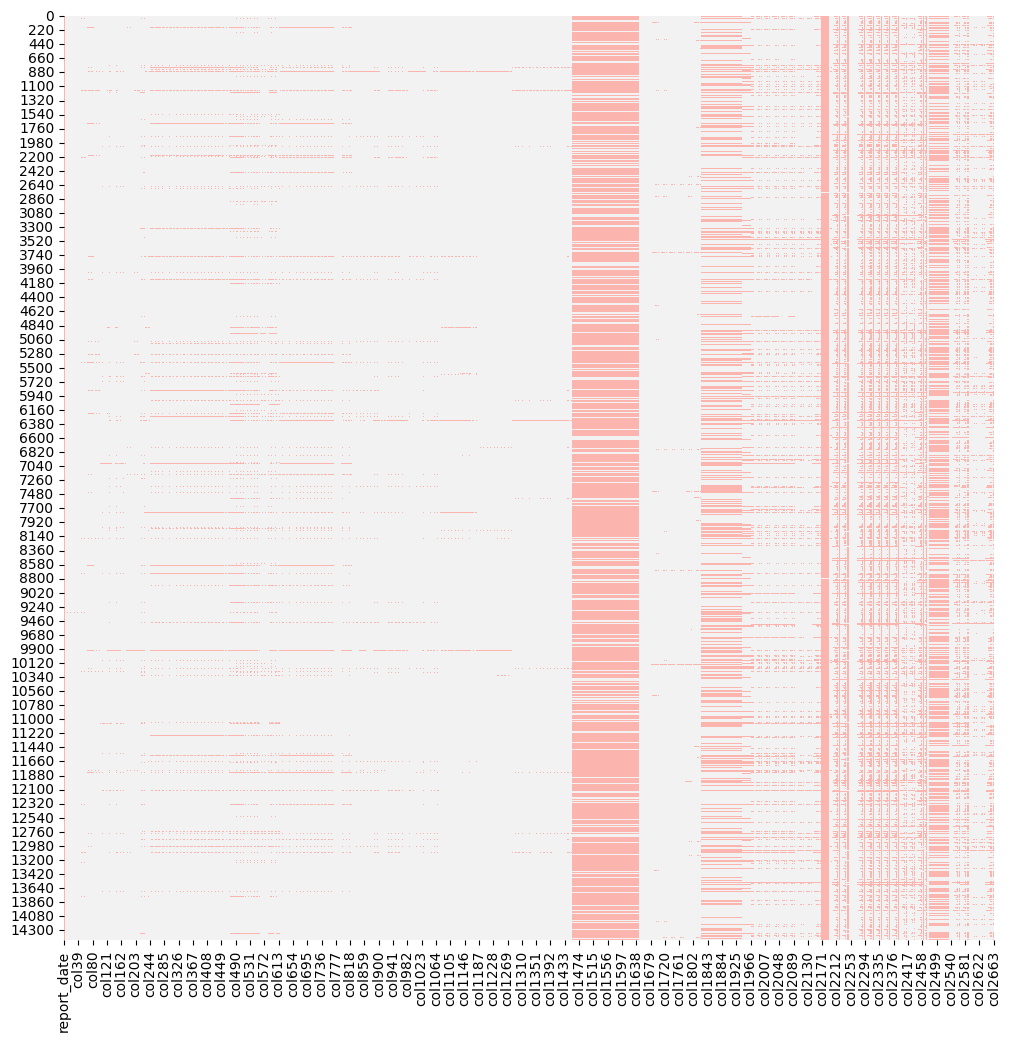

In [4]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(train.isnull(), cbar = False, cmap = 'Pastel1')
plt.show()

Удаляем столбцы, где количество ненулевых значений меньше порога


In [5]:
# Устанавливаем порог заполненности
threshold = 0.2

# Рассчитываем порог количества ненулевых значений
min_non_null_count = int(threshold * len(train))

# Удаляем столбцы, где количество ненулевых значений меньше порога
filtered_train = train.dropna(axis=1, thresh=min_non_null_count)

# Сохраняем результат (опционально)
filtered_train.to_csv("filtered_train.csv", index=False)


Сохраняем 6000 строк с максимально заполненными данными

In [6]:
filtered_train = filtered_train.copy()

# Добавляем столбец с количеством ненулевых значений
filtered_train['non_null_count'] = filtered_train.notnull().sum(axis=1)

# Сортируем строки по количеству ненулевых значений
train_sorted = filtered_train.sort_values(by='non_null_count', ascending=False)

# Сохраняем только первые 6000 строк
filtered_train = train_sorted.head(6000)

# Удаляем вспомогательный столбец
filtered_train = filtered_train.drop(columns=['non_null_count'])

# Сохраняем результат (опционально)
filtered_train.to_csv("filtered_train.csv", index=False)

In [7]:
filtered_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 4587 to 12610
Columns: 539 entries, report_date to col2663
dtypes: float64(534), int64(3), object(2)
memory usage: 24.7+ MB


In [8]:
for column in filtered_train.columns:
    print(f"Столбец: {column}")
    print(train[column].unique())
    print("-" * 50)

Выходные данные были обрезаны до нескольких последних строк (5000).
[ 0. nan  1.]
--------------------------------------------------
Столбец: col1522
[ 0. nan  1.]
--------------------------------------------------
Столбец: col1523
[ 0. nan  1.]
--------------------------------------------------
Столбец: col1524
[ 0. nan  1.]
--------------------------------------------------
Столбец: col1525
[ 0. nan  1.]
--------------------------------------------------
Столбец: col1526
[ 0. nan  1.]
--------------------------------------------------
Столбец: col1527
[ 0. nan]
--------------------------------------------------
Столбец: col1528
[ 0. nan]
--------------------------------------------------
Столбец: col1529
[ 0. nan]
--------------------------------------------------
Столбец: col1530
[ 0. nan]
--------------------------------------------------
Столбец: col1531
[ 0. nan]
--------------------------------------------------
Столбец: col1532
[ 0. nan]
----------------------------------------

In [9]:
# Количество строк
total_rows = filtered_train.shape[0]

# Процент пропусков в строке
missing_values = (filtered_train.isnull().sum() / total_rows) * 100

# Столбцы с пропущенными значениями и их процент
print(missing_values[missing_values > 0])

for column in filtered_train.columns:
    missing_count = filtered_train[column].isnull().sum()
    if missing_count > 0:
        missing_percentage = (missing_count / total_rows) * 100
        print(f"{column}: {missing_percentage:.2f}%")

col1823    27.683333
col1824    27.683333
col1825    27.683333
col1826    27.683333
col1827    27.683333
             ...    
col2655    35.683333
col2656    35.683333
col2660    27.100000
col2661    27.100000
col2662    27.100000
Length: 317, dtype: float64
col1823: 27.68%
col1824: 27.68%
col1825: 27.68%
col1826: 27.68%
col1827: 27.68%
col1828: 27.68%
col1829: 27.68%
col1830: 27.68%
col1831: 27.68%
col1832: 27.68%
col1833: 27.68%
col1834: 27.68%
col1835: 27.68%
col1836: 27.68%
col1837: 27.68%
col1838: 27.68%
col1839: 27.68%
col1840: 27.68%
col1841: 27.68%
col1842: 27.68%
col1843: 27.68%
col1844: 27.68%
col1845: 27.68%
col1846: 27.68%
col1847: 27.68%
col1848: 27.68%
col1849: 27.68%
col1850: 27.68%
col1851: 27.68%
col1852: 27.68%
col1853: 27.68%
col1854: 27.68%
col1855: 27.68%
col1856: 27.68%
col1857: 27.68%
col1858: 27.68%
col1859: 27.68%
col1860: 27.68%
col1861: 27.68%
col1862: 27.68%
col1863: 27.68%
col1864: 27.68%
col1865: 27.68%
col1866: 27.68%
col1867: 27.68%
col1868: 27.68%
col18

In [11]:
filtered_train.describe()

,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,col1461,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,2.400000e+03,2.400000e+03,2.400000e+03,3.859000e+03,3.859000e+03,3.859000e+03,4.374000e+03,4.374000e+03,4.374000e+03,6000.000000
mean,3148.441167,0.030500,0.101667,0.019333,0.169000,0.354833,0.524500,0.957667,1.578167,0.143500,...,7.526428e+06,7.438330e+06,7.482195e+06,7.201892e+06,7.064676e+06,7.132716e+06,7.262728e+06,7.082684e+06,7.170589e+06,0.259893
std,2057.496871,0.171973,0.302235,0.155875,0.527085,0.741632,0.839554,1.033628,1.217294,0.500616,...,5.314552e+06,5.301514e+06,5.299188e+06,5.044973e+06,5.017241e+06,5.011667e+06,4.952675e+06,4.911290e+06,4.904286e+06,0.008995
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,1.000000e+05,3.000000e+05,3.000000e+05,1.000000e+05,3.000000e+05,0.230849
25%,1419.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,4.795000e+06,4.720000e+06,4.756420e+06,4.415393e+06,4.297782e+06,4.365400e+06,4.485000e+06,4.355789e+06,4.447200e+06,0.256718
50%,2912.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,6.850000e+06,6.780769e+06,6.818669e+06,6.437000e+06,6.300000e+06,6.400000e+06,6.500000e+06,6.379440e+06,6.478000e+06,0.257017
75%,4658.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,...,9.452000e+06,9.310000e+06,9.356482e+06,9.152000e+06,9.000000e+06,9.100000e+06,9.217049e+06,9.000000e+06,9.135746e+06,0.258634
max,8302.000000,1.000000,1.000000,3.000000,11.000000,11.000000,11.000000,20.000000,20.000000,11.000000,...,9.800000e+07,9.800000e+07,9.800000e+07,9.800000e+07,9.800000e+07,9.800000e+07,9.800000e+07,9.800000e+07,9.800000e+07,0.339800


In [15]:
# Пример обработки выбросов с помощью IQR
for col in filtered_train.select_dtypes(include=['float64', 'int64']):
    Q1 = filtered_train[col].quantile(0.25)
    Q3 = filtered_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Заменяем выбросы на границы
    filtered_train[col] = np.where(filtered_train[col] < lower_bound, lower_bound, filtered_train[col])
    filtered_train[col] = np.where(filtered_train[col] > upper_bound, upper_bound, filtered_train[col])

In [16]:
# Заполнение медианой для всех числовых столбцов с пропусками
for col in filtered_train.select_dtypes(include=['float64', 'int64']):
    if filtered_train[col].isnull().sum() > 0:
        filtered_train[col] = filtered_train[col].fillna(filtered_train[col].median())

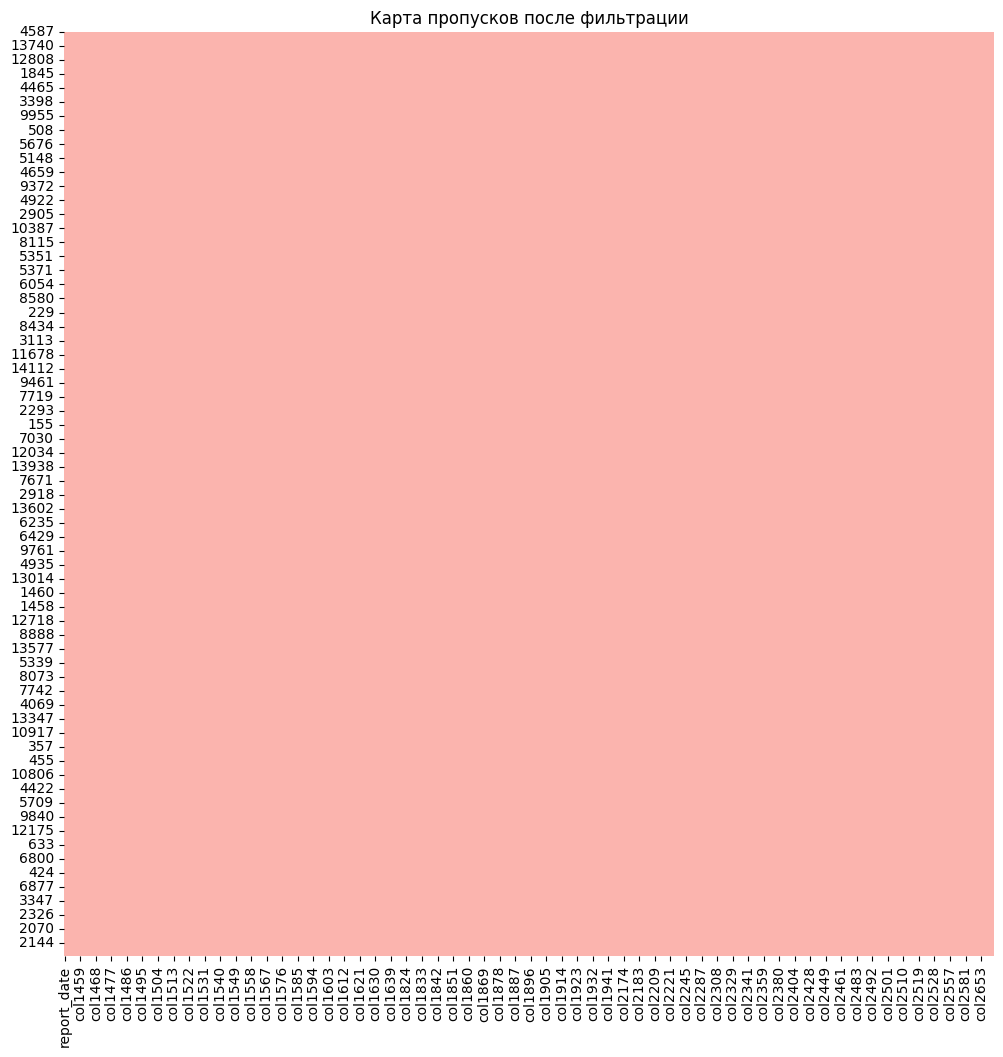

In [18]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(filtered_train.isnull(), cbar=False, cmap='Pastel1')
plt.title("Карта пропусков после фильтрации")
plt.show()

In [19]:
filtered_train.describe(include=['object'])

,report_date,col1454
count,6000,6000
unique,13,3083
top,2023-01-01,205d707a-4f9e-42b8-9e62-104f56c7d392
freq,617,9


In [20]:
filtered_train

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
4587,2022-04-01,4678.0,0.0,0.0,8d818007-99ed-48d6-97f2-b469d2fa6d46,0.0,0.0,2.0,2.0,2.0,...,4700000.0,4700000.0,4700000.0,4700000.0,4700000.0,4700000.0,4700000.0,4700000.0,4700000.0,0.256919
7993,2023-01-01,6366.0,0.0,0.0,5a0e8218-b84e-ed11-b824-005056b89b68,0.0,0.0,0.0,1.0,1.0,...,4000000.0,4000000.0,4000000.0,4000000.0,4000000.0,4000000.0,4000000.0,4000000.0,4000000.0,0.257217
3751,2022-04-01,343.0,0.0,0.0,cb95a13c-c210-4322-8df1-4b049b6d54d4,0.0,0.0,2.0,2.5,2.5,...,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,0.261508
2753,2023-01-01,3299.0,0.0,0.0,652108da-937b-ed11-b824-005056b89b68,0.0,0.0,1.0,1.0,1.0,...,7106000.0,7106000.0,7106000.0,7106000.0,7106000.0,7106000.0,7106000.0,7106000.0,7106000.0,0.261033
13497,2022-07-01,6201.0,0.0,0.0,ce526345-4bab-ec11-b823-005056b8a72c,0.0,0.0,0.0,0.0,1.0,...,10088699.0,10088699.0,10088699.0,10088699.0,10088699.0,10088699.0,10088699.0,10088699.0,10088699.0,0.258133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12517,2022-11-01,1784.0,0.0,0.0,63c712f7-32e2-4759-82e8-2fe225aaf3d0,0.0,0.0,0.0,0.0,0.0,...,6850000.0,6780769.0,6818669.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,0.256061
12605,2022-02-01,4314.0,0.0,0.0,b8adac56-e2de-4949-b763-8272918a06cb,0.0,0.0,1.0,1.0,1.0,...,6850000.0,6780769.0,6818669.0,11228000.0,11228000.0,11228000.0,11228000.0,11228000.0,11228000.0,0.256061
7994,2022-09-01,1005.0,0.0,0.0,5e3d26fc-8e76-4bbd-9e3a-1f2bf91cb635,0.0,0.0,0.0,0.0,0.0,...,6850000.0,6780769.0,6818669.0,4850000.0,4850000.0,4850000.0,4850000.0,4850000.0,4850000.0,0.256261
8992,2022-10-01,1888.0,0.0,0.0,b9f44472-2b0f-4ee5-b118-a195375d09bb,0.0,0.0,0.0,0.0,0.0,...,6850000.0,6780769.0,6818669.0,6685000.0,6685000.0,6685000.0,6685000.0,6685000.0,6685000.0,0.259350


In [21]:
# Обработка колонки report_date
# Преобразование в формат datetime
filtered_train['report_date'] = pd.to_datetime(filtered_train['report_date'], errors='coerce')

# Проверка на наличие пропусков после преобразования
if filtered_train['report_date'].isnull().sum() > 0:
    print("Пропуски в report_date обнаружены после преобразования в datetime.")
    # Заполнение пропусков медианной датой (опционально)
    median_date = filtered_train['report_date'].median()
    filtered_train['report_date'] = filtered_train['report_date'].fillna(median_date)

# Извлечение числовых признаков из даты (оптимизированный подход)
new_columns = pd.DataFrame({
    'year': filtered_train['report_date'].dt.year,
    'month': filtered_train['report_date'].dt.month,
    'day': filtered_train['report_date'].dt.day
}, index=filtered_train.index)

# Добавляем новые столбцы сразу
filtered_train = pd.concat([filtered_train, new_columns], axis=1)

# Удаление оригинального столбца report_date
filtered_train = filtered_train.drop(columns=['report_date'])

In [22]:
filtered_train.drop(columns=['col1454'], axis=1, inplace=True)